In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('white')
%matplotlib inline 
import pandas as pd
pd.options.mode.chained_assignment = None

from matplotlib import rcParams

## Overview

__Objective__: to predict `crim` (crime rate in the city of boston) based on 

1. CRIM:     per capita crime rate by town on a scale of 100
2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT    % lower status of the population


# Data exploration

In [2]:
raw_data = pd.read_csv('Data_final.csv')

## Independent variables

### View first 5 rows of data

In [3]:
raw_data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,26.157783,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,22.961203,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,19.169242,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,17.355160,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,19.063509,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


### Any missing values?

In [4]:
raw_data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
dtype: int64

### Overview of data statistics

In [5]:
raw_data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,38.808590,13.295257,9.205158,0.140765,1.101175,15.679800,58.744660,6.173308,78.063241,339.317787,42.614980,332.791107,11.537806
std,21.291308,23.048697,7.169630,0.312765,1.646991,27.220206,33.104049,6.476435,203.542157,180.670077,87.585243,125.322456,6.064932
min,0.000000,0.000000,0.000000,0.000000,0.385000,3.561000,1.137000,1.129600,1.000000,20.200000,2.600000,0.320000,1.730000
25%,25.041347,0.000000,3.440000,0.000000,0.449000,5.961500,32.000000,2.430575,4.000000,254.000000,17.000000,364.995000,6.877500
50%,34.249826,0.000000,6.960000,0.000000,0.538000,6.322500,65.250000,3.925850,5.000000,307.000000,18.900000,390.660000,10.380000
75%,46.617277,18.100000,18.100000,0.000000,0.647000,6.949000,89.975000,6.332075,24.000000,403.000000,20.200000,395.615000,15.015000
max,100.000000,100.000000,27.740000,1.000000,7.313000,100.000000,100.000000,24.000000,666.000000,711.000000,396.900000,396.900000,34.410000


### Histograms

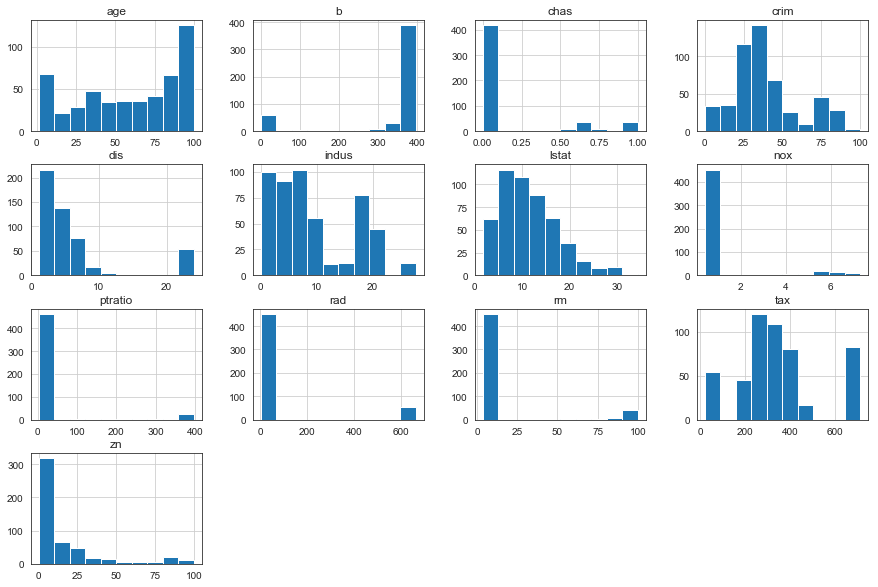

In [6]:
rcParams['figure.figsize'] = 15, 10
raw_data.hist();

__Explore some individual variables__

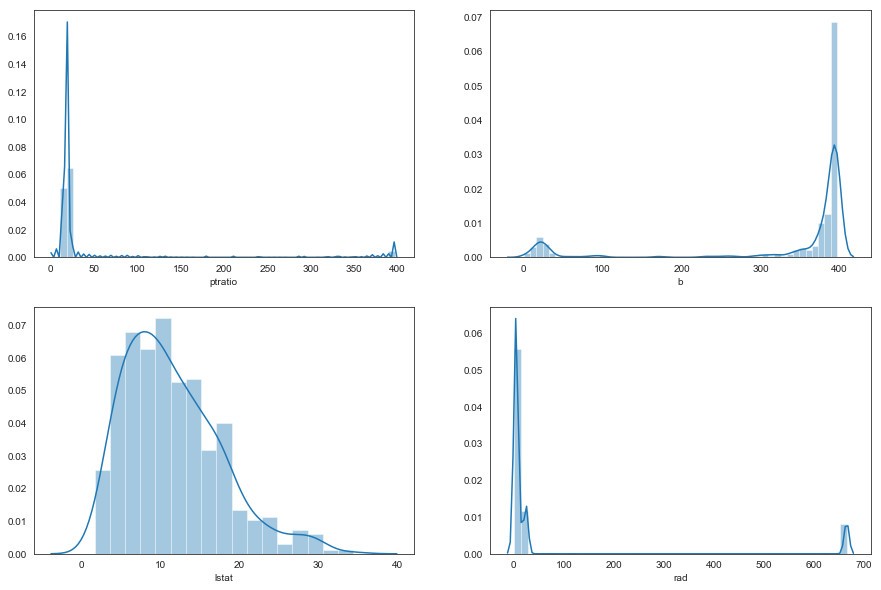

In [7]:
fig = plt.figure()
fig.add_subplot(221)
sb.distplot(raw_data['ptratio'])
fig.add_subplot(222)
sb.distplot(raw_data['b'])
fig.add_subplot(223)
sb.distplot(raw_data['lstat'])
fig.add_subplot(224)
sb.distplot(raw_data['rad'])
plt.show()

In [9]:
print('Correlation matrix for dataset:')
np.round(raw_data.corr(),2)

Correlation matrix for dataset:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.00,-0.29,0.76,-0.29,-0.44,-0.49,0.58,-0.58,-0.46,0.96,-0.38,0.24,0.51
zn,-0.29,1.00,-0.49,-0.01,0.04,0.08,-0.49,0.27,0.06,-0.26,0.05,0.02,-0.39
indus,0.76,-0.49,1.00,-0.19,-0.39,-0.45,0.70,-0.61,-0.43,0.75,-0.35,0.23,0.47
chas,-0.29,-0.01,-0.19,1.00,0.59,0.59,-0.27,0.52,0.59,-0.35,0.47,-0.50,0.01
nox,-0.44,0.04,-0.39,0.59,1.00,0.98,-0.55,0.92,0.99,-0.57,0.78,-0.86,0.08
rm,-0.49,0.08,-0.45,0.59,0.98,1.00,-0.60,0.95,0.99,-0.61,0.81,-0.85,0.03
age,0.58,-0.49,0.70,-0.27,-0.55,-0.60,1.00,-0.74,-0.59,0.64,-0.48,0.42,0.41
dis,-0.58,0.27,-0.61,0.52,0.92,0.95,-0.74,1.00,0.95,-0.69,0.77,-0.78,-0.08
rad,-0.46,0.06,-0.43,0.59,0.99,0.99,-0.59,0.95,1.00,-0.59,0.81,-0.86,0.06
tax,0.96,-0.26,0.75,-0.35,-0.57,-0.61,0.64,-0.69,-0.59,1.00,-0.49,0.37,0.28


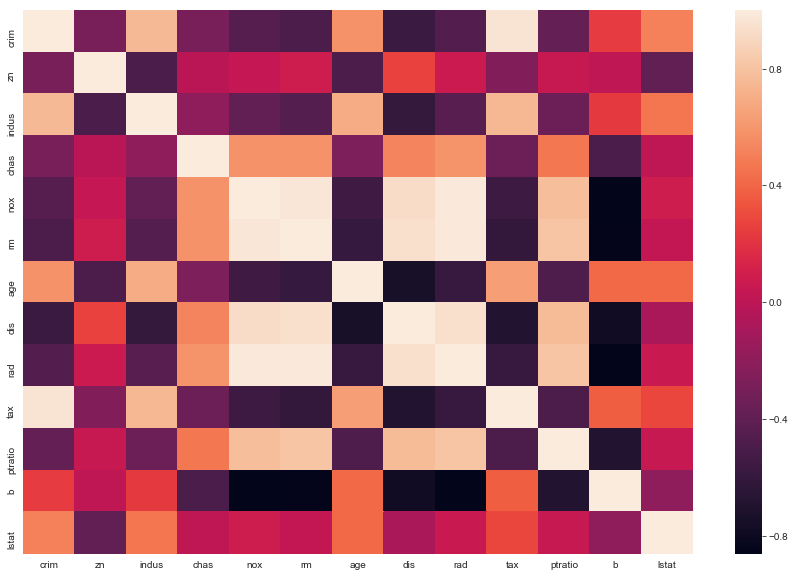

In [10]:
sb.heatmap(raw_data.corr(method='pearson'));

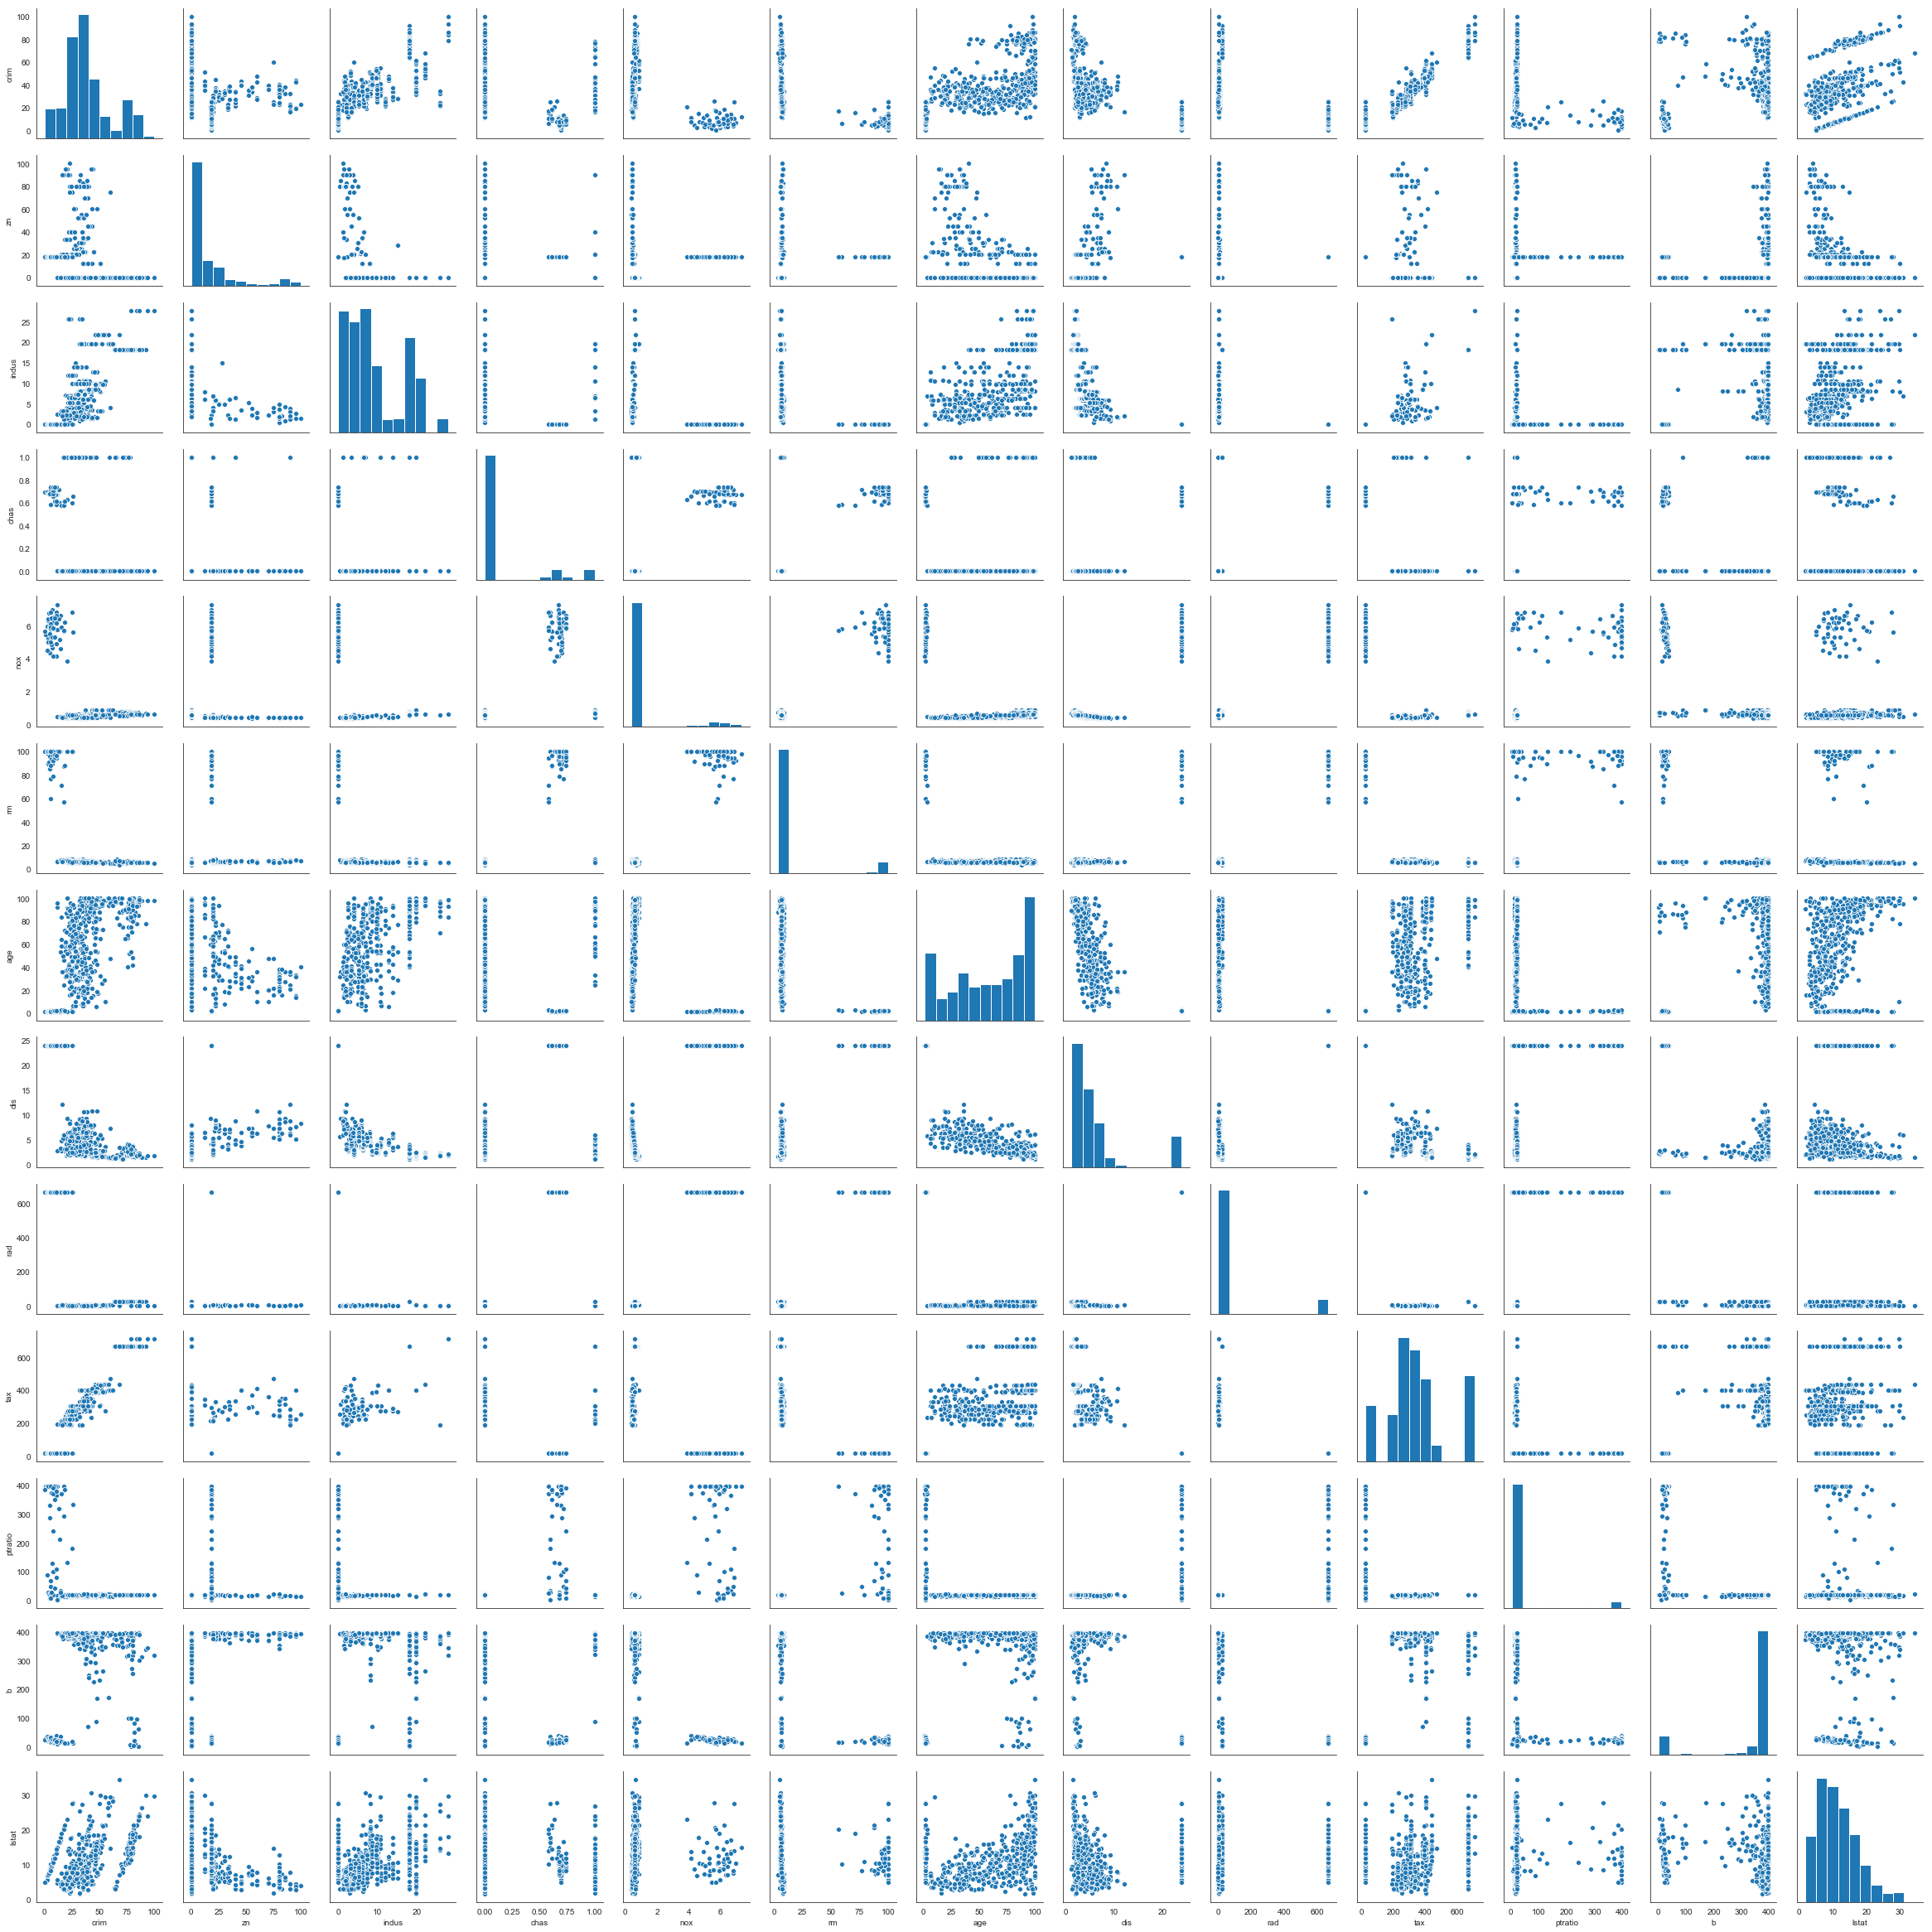

In [11]:
sb.pairplot(raw_data);

Only plot of crime against all other variables

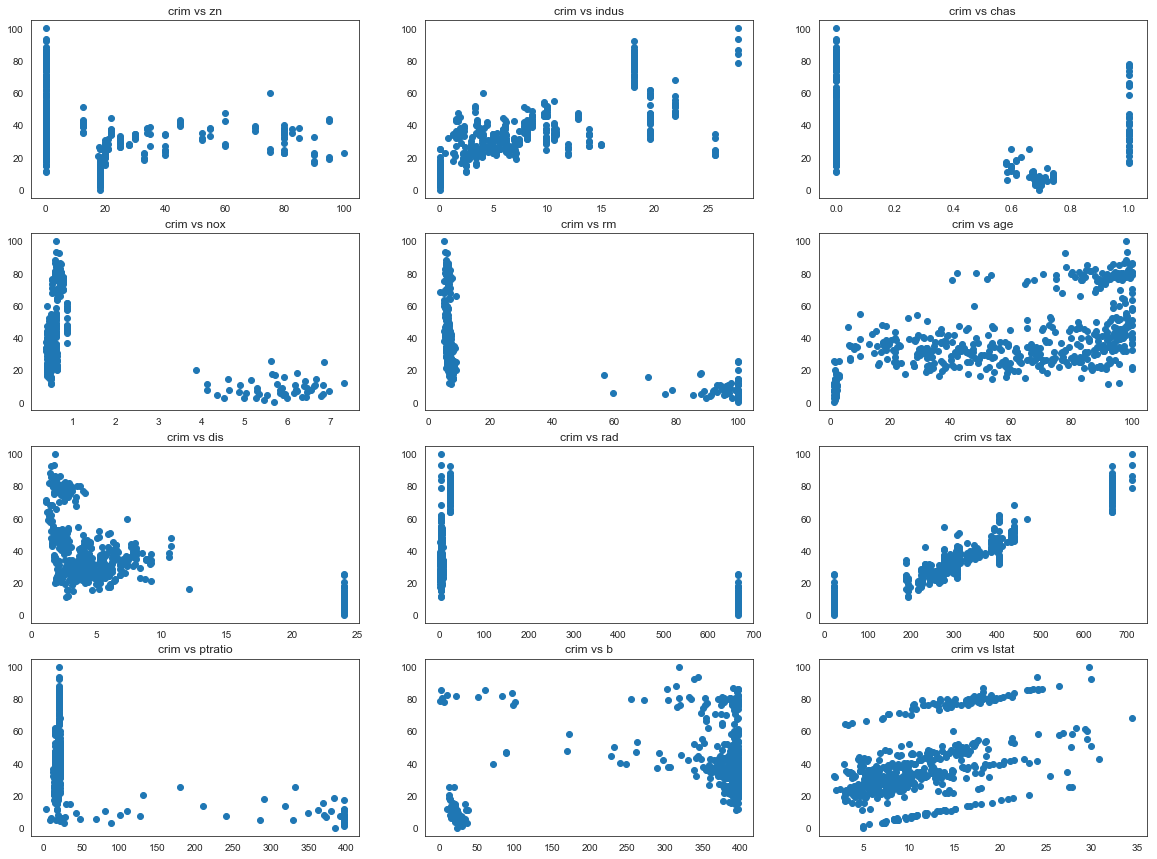

In [12]:
fig = plt.figure(figsize=(20,15))
for id, var in enumerate(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']):
    panel = id+1
    fig.add_subplot(4,3,panel)
    plt.scatter(raw_data[var], raw_data['crim'])
    plt.title(str("crim vs {}".format(var)))
    fig.set_xlabel= str(var)
    fig.set_ylabel = 'crim'
plt.show()

## Dependent variable

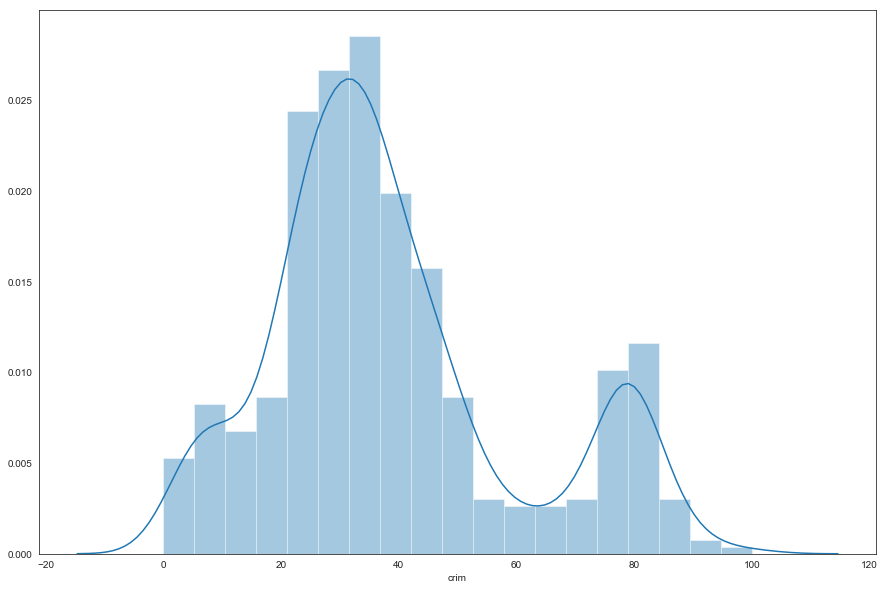

In [13]:
sb.distplot(raw_data['crim']);

### Outliers 
What are the quantiles in `crim`? Any outliers? 

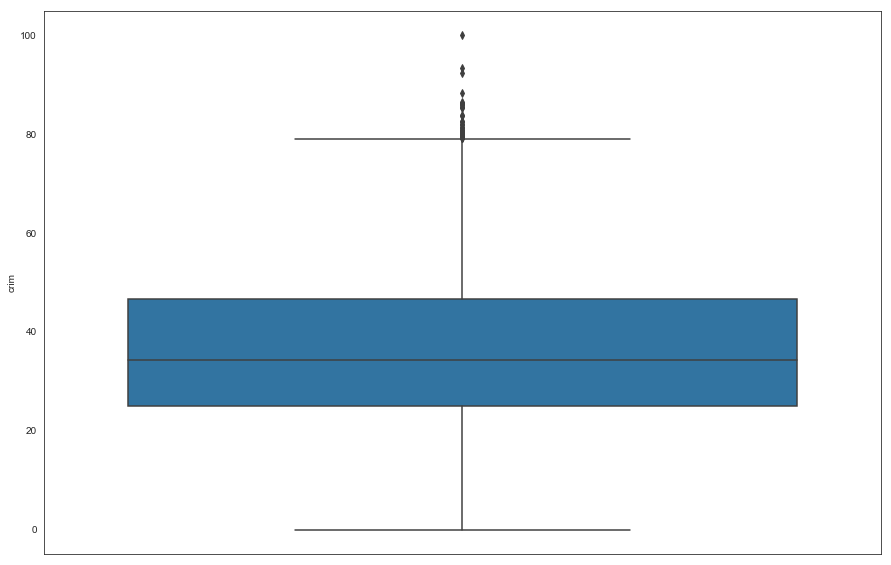

In [14]:
sb.boxplot(raw_data['crim'], orient='v');

It looks like values above 80 are outliers. 

What is the 95th and 99th quantile of `crim`? 

In [15]:
q95 = raw_data['crim'].quantile(0.95)
q95

80.3152353000533

Let's remove outliers i.e. data points where `crim` > 80 

In [16]:
print('Shape before outlier removal', raw_data.shape)
raw_data = raw_data.loc[raw_data['crim']<q95,]
print('Shape after outlier removal', raw_data.shape)

Shape before outlier removal (506, 13)
Shape after outlier removal (480, 13)


26 rows were deleted

## Train and test data

In [17]:
np.random.seed(0)
raw_data['rand'] = [np.random.random() for row in raw_data.index] # Genrate numbers between 0 and 1 for each row 
train_df = raw_data.loc[raw_data['rand']<=0.7] # Separate 70% as train
test_df = raw_data.loc[raw_data['rand']>0.7] # test_df = # Separate 30% as test

In [18]:
print('Shape of original data: {} \n Shape of train data: {} \n Shape of test data: {}'.format(raw_data.shape, train_df.shape, test_df.shape))
print('*-*'*20)
print(" Fraction in train: {0:.2}, \n Fraction in test:{1:.2}".format(train_df.shape[0]/raw_data.shape[0],
                                               test_df.shape[0]/raw_data.shape[0]))

Shape of original data: (480, 14) 
 Shape of train data: (343, 14) 
 Shape of test data: (137, 14)
*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
 Fraction in train: 0.71, 
 Fraction in test:0.29


## Model with all variables

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
train_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rand
0,26.157783,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,0.548814
2,19.169242,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,0.602763
3,17.355160,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,0.544883
4,19.063509,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,0.423655
5,18.285207,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,0.645894


In [21]:
test_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rand
1,22.961203,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0.715189
7,39.547985,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,0.891773
8,51.034443,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,0.963663
10,41.185894,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,0.791725
13,31.446247,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26,0.925597


In [22]:
train_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'rand'],
      dtype='object')

In [23]:
X_train = train_df.loc[:,['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
y_train = train_df[['crim']]
print('Independent variables in train data: ', X_train.columns)
X_test = test_df.loc[:,['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax','ptratio', 'b', 'lstat']]
y_test = test_df[['crim']]
print('Independent variables in test data: ', X_test.columns)

lr_mod = LinearRegression().fit(X_train, y_train)

Independent variables in train data:  Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')
Independent variables in test data:  Index(['zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')


In [24]:
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)

est = sm.OLS(y_train, X2.astype(float))
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.013e+04
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:38:54   Log-Likelihood:                -291.05
No. Observations:                 343   AIC:                             608.1
Df Residuals:                     330   BIC:                             658.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.9085      0.410    -16.852      0.0

### <font color='green'> Model diagnostics </font>

#### p-values
Many variables are insignificant (large p-values). 

In [25]:
train_df['crim_pred'] = lr_mod.predict(X_train)
train_df['error'] = train_df['crim'] - train_df['crim_pred']
test_df['crim_pred'] = lr_mod.predict(X_test)
test_df['error'] = test_df['crim'] - test_df['crim_pred']

####  VIFs 

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [27]:
X = add_constant(X_train)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const      173.554484
zn           1.879581
indus        3.396354
chas         1.635689
nox         36.582955
rm         108.903241
age          3.820895
dis         31.226676
rad        187.965160
tax          2.944897
ptratio      2.919082
b            9.309858
lstat        1.557575
dtype: float64

## Improve the model

VIFs are very high for `nox`, `rm`, `dis`, `rad`, `b`.

Looking at the correlation matrix, these are indeed highly correlated. Let us drop these, as well as `zn`, `indus`, `chas` and `ptratio` which are insignificant.

In [28]:
X_train = train_df.loc[:,['age', 'tax', 'lstat']]
y_train = train_df[['crim']]
print('Independent variables in train data: ', X_train.columns)
X_test = test_df.loc[:,['age', 'tax', 'lstat']]
y_test = test_df[['crim']]
print('Independent variables in test data: ', X_test.columns)

lr_mod = LinearRegression().fit(X_train, y_train)


import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X_train)

est = sm.OLS(y_train, X2.astype(float))
est2 = est.fit()
print(est2.summary())

Independent variables in train data:  Index(['age', 'tax', 'lstat'], dtype='object')
Independent variables in test data:  Index(['age', 'tax', 'lstat'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.218e+05
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:39:32   Log-Likelihood:                -293.77
No. Observations:                 343   AIC:                             595.5
Df Residuals:                     339   BIC:                             610.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

### <font color='green'> Model diagnostics </font>

#### p-values

All variables are significant 

#### VIFs

In [29]:
X = add_constant(X_train)

pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

const    7.632494
age      1.760302
tax      1.613499
lstat    1.120629
dtype: float64

VIFs are within control

In [30]:
train_df['crim_pred'] = lr_mod.predict(X_train)
train_df['error'] = train_df['crim'] - train_df['crim_pred']
test_df['crim_pred'] = lr_mod.predict(X_test)
test_df['error'] = test_df['crim'] - test_df['crim_pred']

#### Autocorrelation

In [31]:
from statsmodels.stats.stattools import durbin_watson

Null hypothesis: No autocorrelation

In [32]:
durbin_watson(train_df['error'])

2.198199890962822

No evidence of autocorrelation

#### Heteroscedasticity tests 

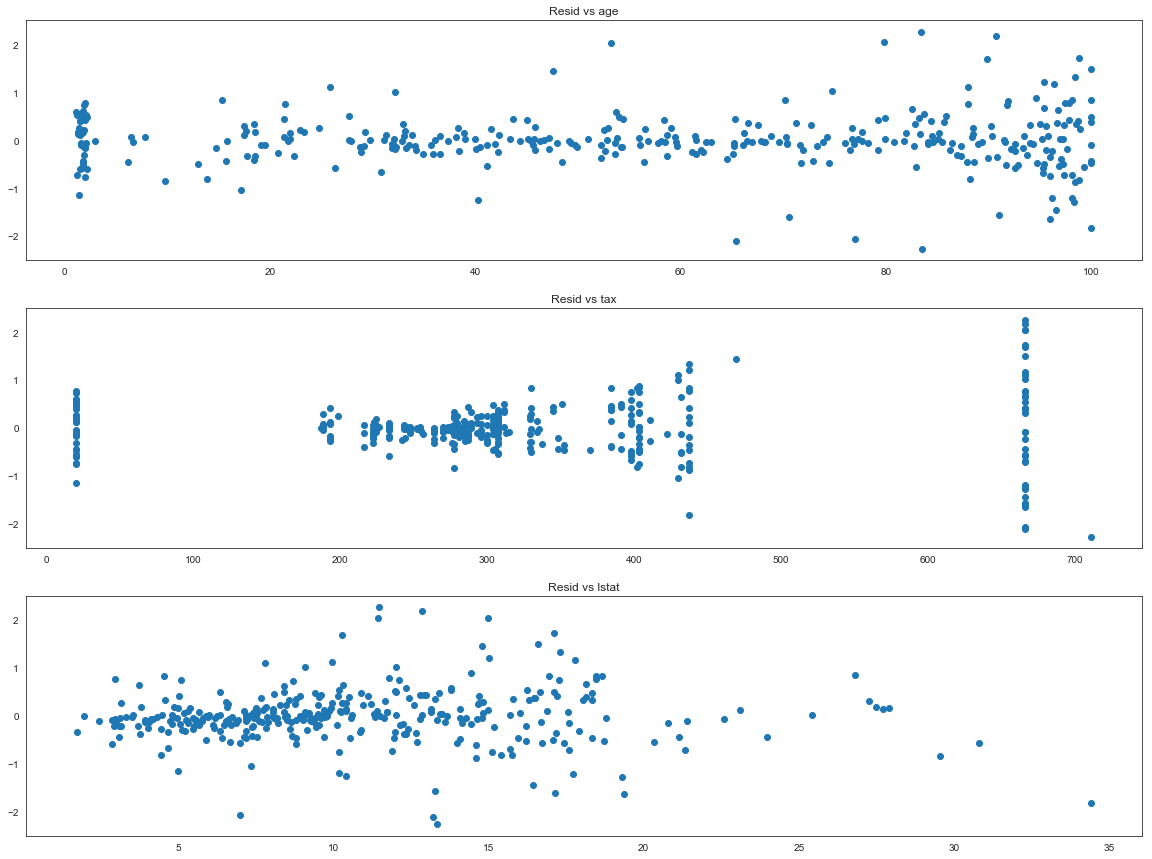

In [33]:
fig = plt.figure(figsize=(20,15))
for id, var in enumerate(['age', 'tax', 'lstat']):
    panel = id+1
    fig.add_subplot(3,1,panel)
    plt.scatter(train_df[var], train_df['error'])
    plt.title(str("Resid vs {}".format(var)))
plt.show()

In [34]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan

Breusch Pagan Lagrange multiplier test: 

Tests the null hypothesis that the residual variance does not depend on the variables in x

In [35]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = het_breuschpagan(train_df['error'], X2)
list(zip(name, test))

[('Lagrange multiplier statistic', 111.95397329963909),
 ('p-value', 4.16669718680045e-24),
 ('f-value', 54.754453749017706),
 ('f p-value', 6.95055857717104e-29)]

White's test: 

Tests the null hypothesis that the error variance does not depend on x

In [36]:
name = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = het_white(train_df['error'], X2)
list(zip(name, test))

[('Lagrange multiplier statistic', 155.3332752890777),
 ('p-value', 6.914192998400354e-29),
 ('f-value', 30.62520110876841),
 ('f p-value', 8.493992568832834e-39)]

No evidence of heteroscedasticity


## Test data

In [37]:
from sklearn import metrics

In [38]:
test_df['crim_pred'] = lr_mod.predict(X_test)
test_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,rand,crim_pred,error
1,22.961203,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,0.715189,22.931589,0.029614
7,39.547985,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,0.891773,39.634593,-0.086608
8,51.034443,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,0.963663,50.595381,0.439061
10,41.185894,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5,311.0,15.2,392.52,20.45,0.791725,41.195132,-0.009238
13,31.446247,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4,307.0,21.0,396.90,8.26,0.925597,31.293475,0.152772


In [39]:
print('RMSE on train data: {0:.2f} \n RMSE on test data: {1:.2f}'.format(np.sqrt(metrics.mean_squared_error(train_df['crim'],
                                                                                                           lr_mod.predict(X_train))),
                                                                        np.sqrt(metrics.mean_squared_error(test_df['crim'],
                                                                                                           test_df['crim_pred']))))

RMSE on train data: 0.57 
 RMSE on test data: 0.58


In [40]:
print('MAE on train data: {0:.2f} \n MAE on test data: {1:.2f}'.format(np.sqrt(metrics.mean_absolute_error(train_df['crim'],
                                                                                                           lr_mod.predict(X_train))),
                                                                        np.sqrt(metrics.mean_absolute_error(test_df['crim'],
                                                                                                           test_df['crim_pred']))))

MAE on train data: 0.61 
 MAE on test data: 0.61


Visualize how well your model is performing by comparing actual and predicted values

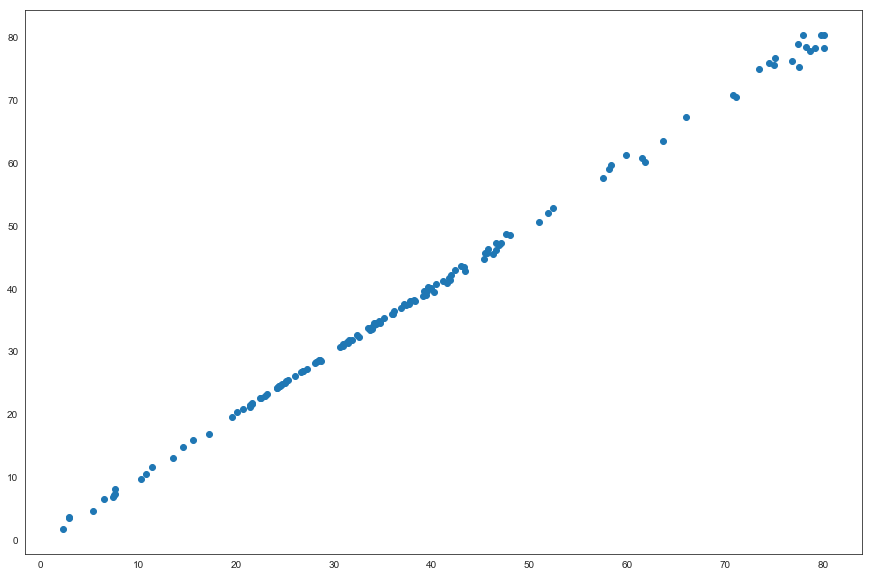

In [41]:
fig = plt.subplot(111)
plt.scatter(test_df['crim'], test_df['crim_pred'])
plt.xlabel = 'Actual'; plt.ylabel='Predicted'
plt.show()

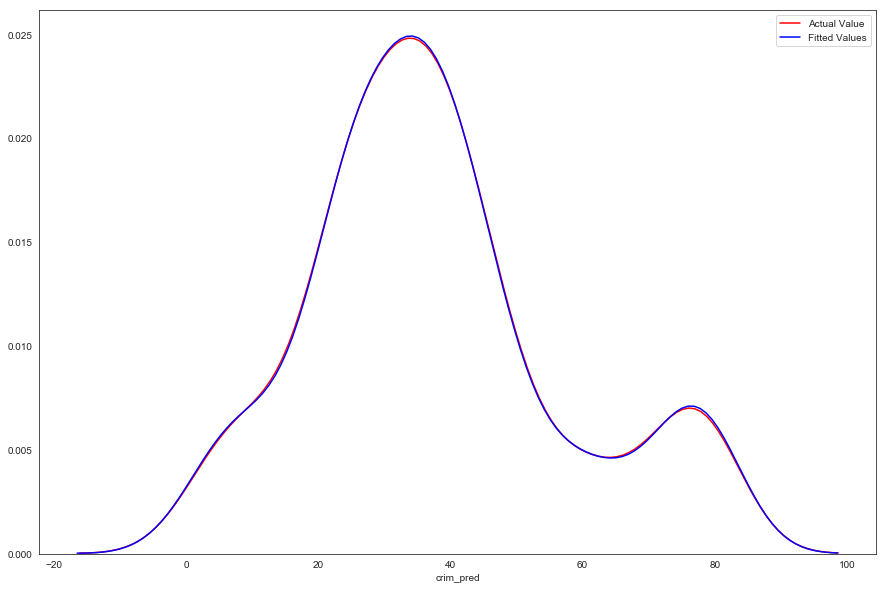

In [42]:
ax1 = sb.distplot(test_df['crim'], hist=False, color="r", label="Actual Value")
sb.distplot(test_df['crim_pred'], hist=False, color="b", label="Fitted Values" , ax=ax1);